<a href="https://colab.research.google.com/github/sudevansujit/IMDB_Sentiment_Analysis/blob/master/IMDB_Sentiment_Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

# One RNN Unit
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Stacking RNN and keeping things in memory
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True)) # Weights will remain the same
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print("Loading Data ....")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)

Loading Data ....
17465344/17464789 [==============================] - 1s 0us/step


In [5]:
print(len(X_train), "Train Length")
print(len(X_test), "Test Length")
print("Pad Sequences (sample x time)")
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)
print("Train Shape ", X_train.shape)
print("Test Shape", X_test.shape)

25000 Train Length
25000 Test Length
Pad Sequences (sample x time)
Train Shape  (25000, 500)
Test Shape (25000, 500)


In [6]:
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)


Epoch 1/10
157/157 [==============================] - 22s 140ms/step - loss: 0.6420 - acc: 0.6087 - val_loss: 0.4796 - val_acc: 0.8016
Epoch 2/10
157/157 [==============================] - 21s 135ms/step - loss: 0.3969 - acc: 0.8292 - val_loss: 0.3781 - val_acc: 0.8388
Epoch 3/10
157/157 [==============================] - 21s 136ms/step - loss: 0.2879 - acc: 0.8836 - val_loss: 0.4026 - val_acc: 0.8248
Epoch 4/10
157/157 [==============================] - 21s 136ms/step - loss: 0.2098 - acc: 0.9219 - val_loss: 0.3744 - val_acc: 0.8450
Epoch 5/10
157/157 [==============================] - 21s 136ms/step - loss: 0.1475 - acc: 0.9470 - val_loss: 0.4396 - val_acc: 0.8232
Epoch 6/10
157/157 [==============================] - 22s 137ms/step - loss: 0.0908 - acc: 0.9699 - val_loss: 0.5261 - val_acc: 0.7926
Epoch 7/10
157/157 [==============================] - 22s 139ms/step - loss: 0.0537 - acc: 0.9841 - val_loss: 0.5456 - val_acc: 0.8136
Epoch 8/10
157/157 [==============================] - 2

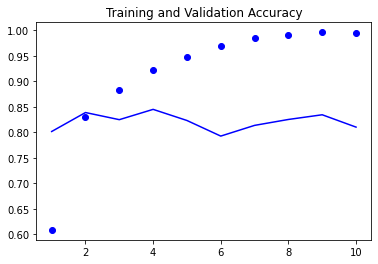

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title("Training and Validation Accuracy")
plt.show()

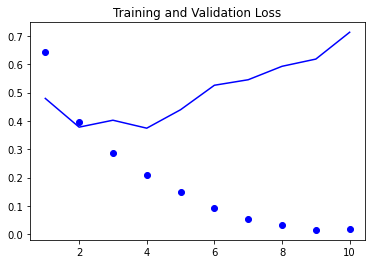

In [8]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.show()